# BIOS512 8/31/21 -- Multiple Plots

## Some Review

First, we load in tidyverse and update overarching settings.

In [ ]:
install.packages('tidyverse')
#library('tidyverse')

also installing the dependencies ‘lattice’, ‘colorspace’, ‘sys’, ‘bit’, ‘ps’, ‘rappdirs’, ‘rematch’, ‘nlme’, ‘Matrix’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘askpass’, ‘bit64’, ‘prettyunits’, ‘processx’, ‘highr’, ‘markdown’, ‘yaml’, ‘xfun’, ‘tinytex’, ‘backports’, ‘ellipsis’, ‘generics’, ‘glue’, ‘assertthat’, ‘blob’, ‘DBI’, ‘lifecycle’, ‘R6’, ‘tidyselect’, ‘vctrs’, ‘withr’, ‘data.table’, ‘gargle’, ‘cellranger’, ‘curl’, ‘ids’, ‘rematch2’, ‘gtable’, ‘isoband’, ‘MASS’, ‘mgcv’, ‘scales’, ‘cpp11’, ‘pkgconfig’, ‘mime’, ‘openssl’, ‘fansi’, ‘utf8’, ‘clipr’, ‘vroom’, ‘tzdb’, ‘progress’, ‘callr’, ‘fs’, ‘knitr’, ‘rmarkdown’, ‘selectr’, ‘stringi’, ‘broom’, ‘cli’, ‘crayon’, ‘dbplyr’, ‘dplyr’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘ggplot2’, ‘haven’, ‘hms’, ‘httr’, ‘jsonlite’, ‘lubridate’, ‘magrittr’, ‘modelr’, ‘pillar’, ‘purrr’, ‘readr’, ‘readxl’, ‘reprex’, ‘rlang’, ‘rstudioapi’, ‘rvest’, ‘stringr’, ‘tibble’, ‘tidyr’, ‘xml2’

Warning message in install.packa

In [3]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res=300)

In [4]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


## Two different ways to map encodings (aes) in ggplot2

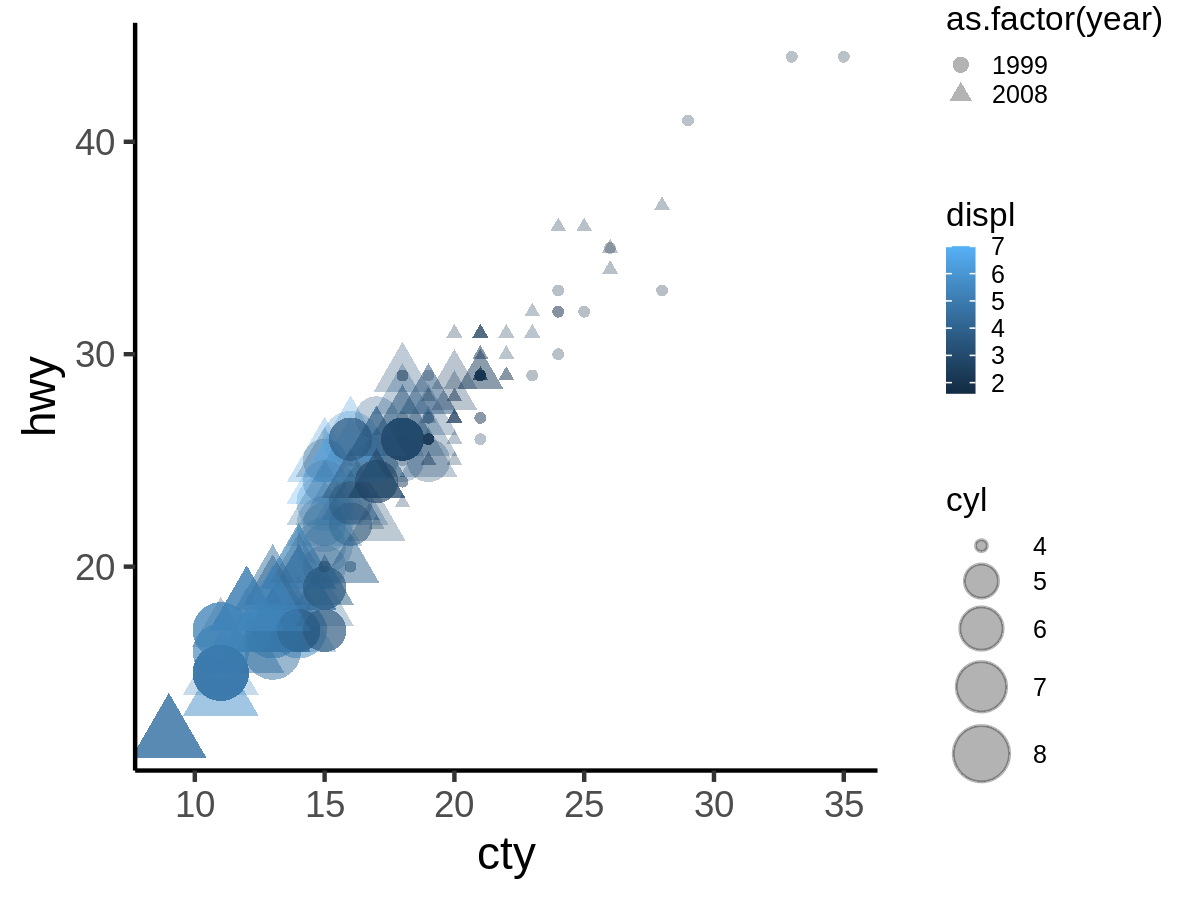

In [5]:
pa = ggplot(mpg, aes(x=cty, y=hwy)) +
geom_point()

p = ggplot(mpg, aes(x=cty, y=hwy, color=displ, size=cyl, shape=as.factor(year)))

p2 = p + geom_point(alpha=.3) + theme_classic() + 
    theme(legend.key.size = unit(0.25, 'cm'),
         legend.title = element_text(size=8),
         legend.text = element_text(size=6))

p2

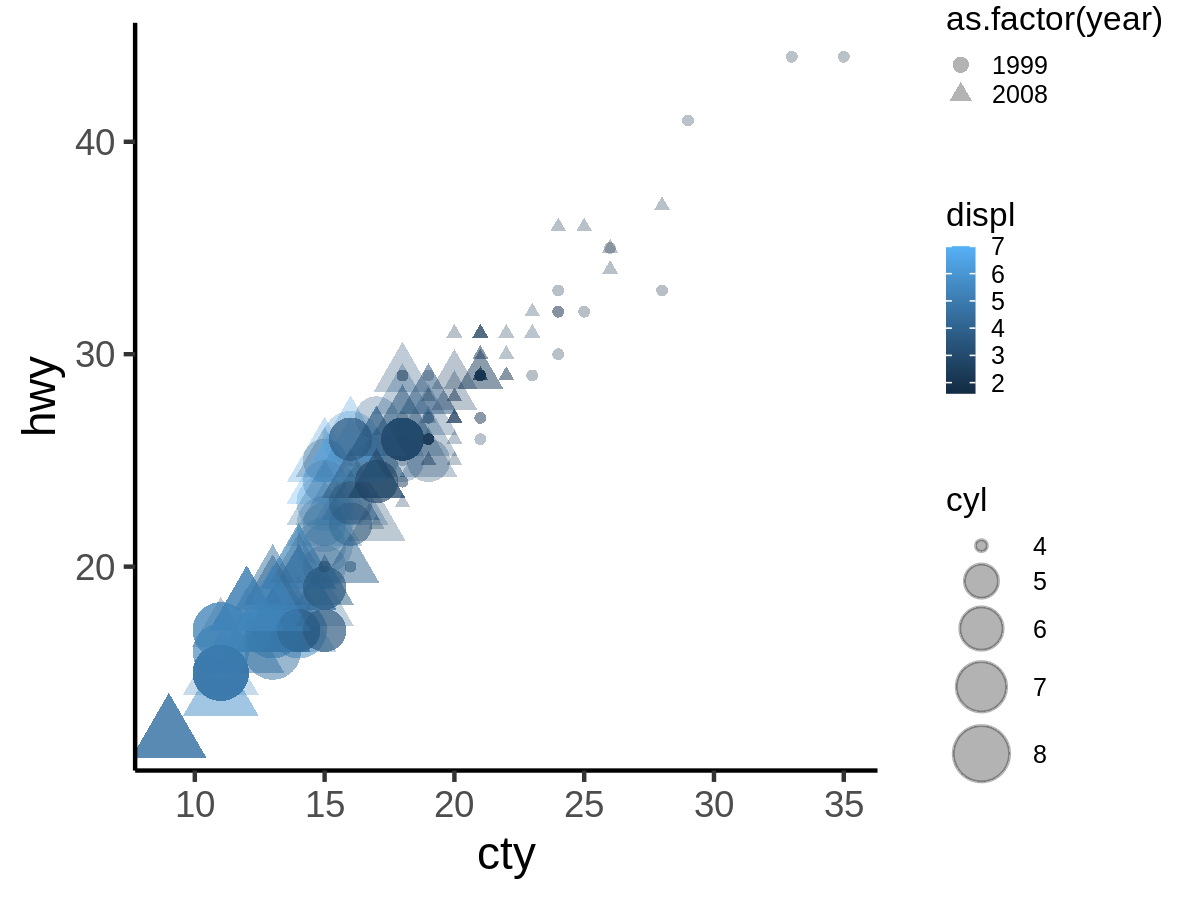

In [6]:
q = ggplot() +
    geom_point(data=mpg, mapping=aes(x=cty, y=hwy, color=displ, size=cyl, shape=as.factor(year)), alpha=.3) +
    theme_classic() +
    theme(legend.key.size = unit(0.25, 'cm'),
         legend.title = element_text(size=8),
         legend.text = element_text(size=6))
q

## Facets

One function to create multiple plots is facet_wrap().

In [7]:
iris %>% head

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


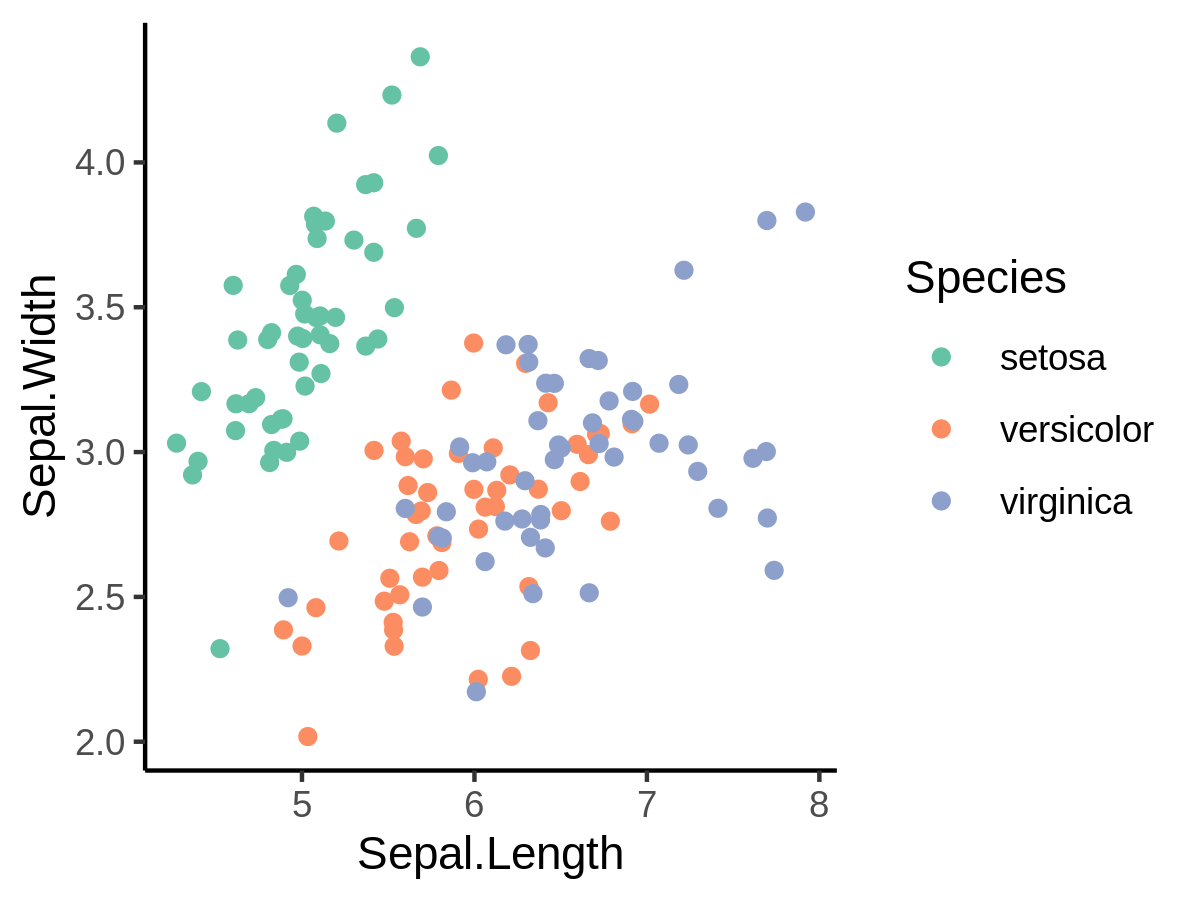

In [8]:
i = ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species))
i2 = i + geom_point(position="jitter") +
    scale_color_brewer(type = "qual", palette = "Set2") 

i2a = i2 +
    theme_classic()

i2a

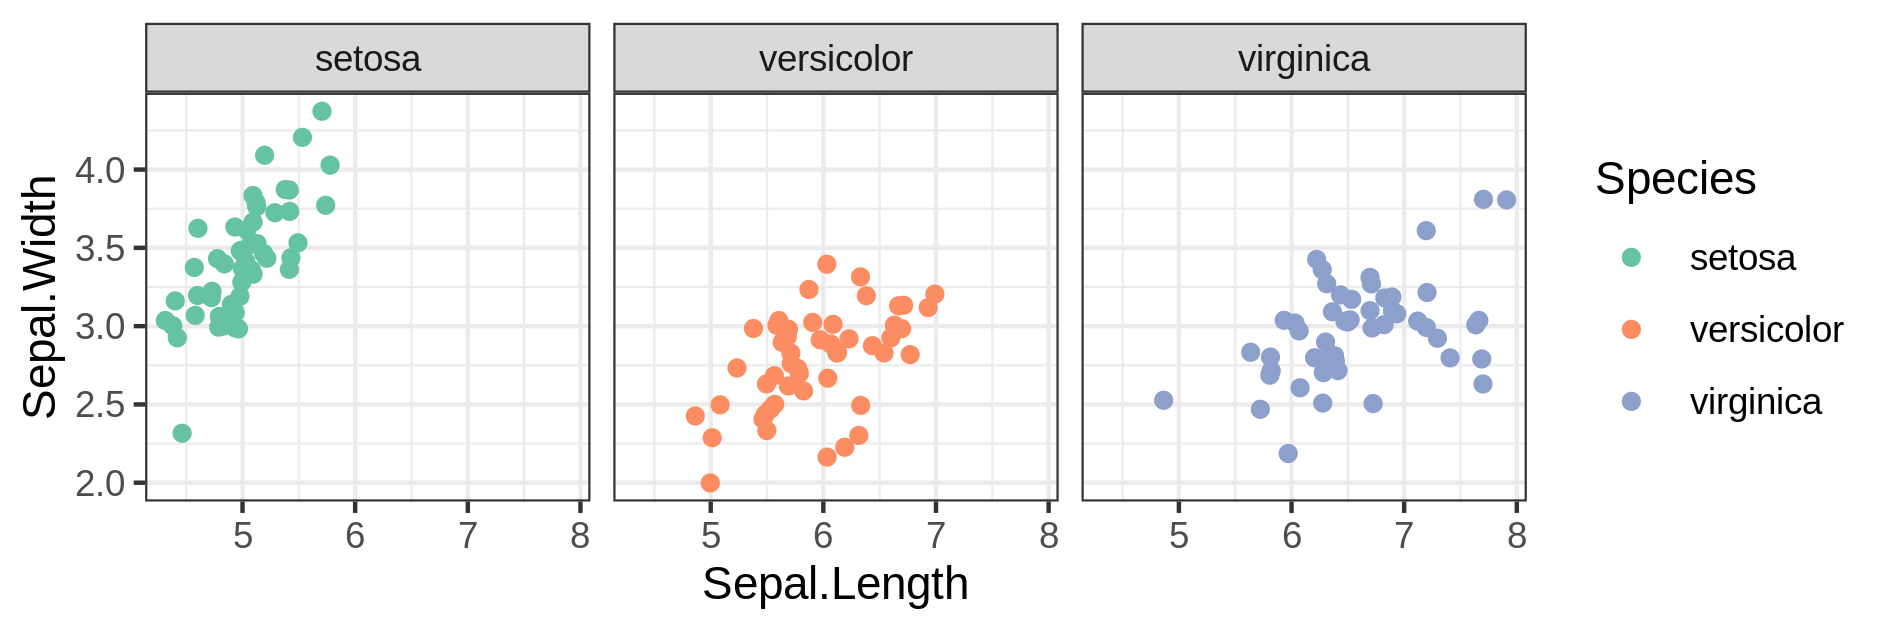

In [9]:
options(repr.plot.width=6.3, repr.plot.height=2.1)
i3 = i2 + facet_wrap(~Species, ncol=3) + theme_bw()
i3

Another function we can use is facet_grid().

In [10]:
mpg %>% group_by(drv) %>% tally %>% arrange(desc(n)) %>% ungroup()
#f = front wheel drive
#4 = four wheel drive
#r = rear wheel drive

drv,n
<chr>,<int>
f,106
4,103
r,25


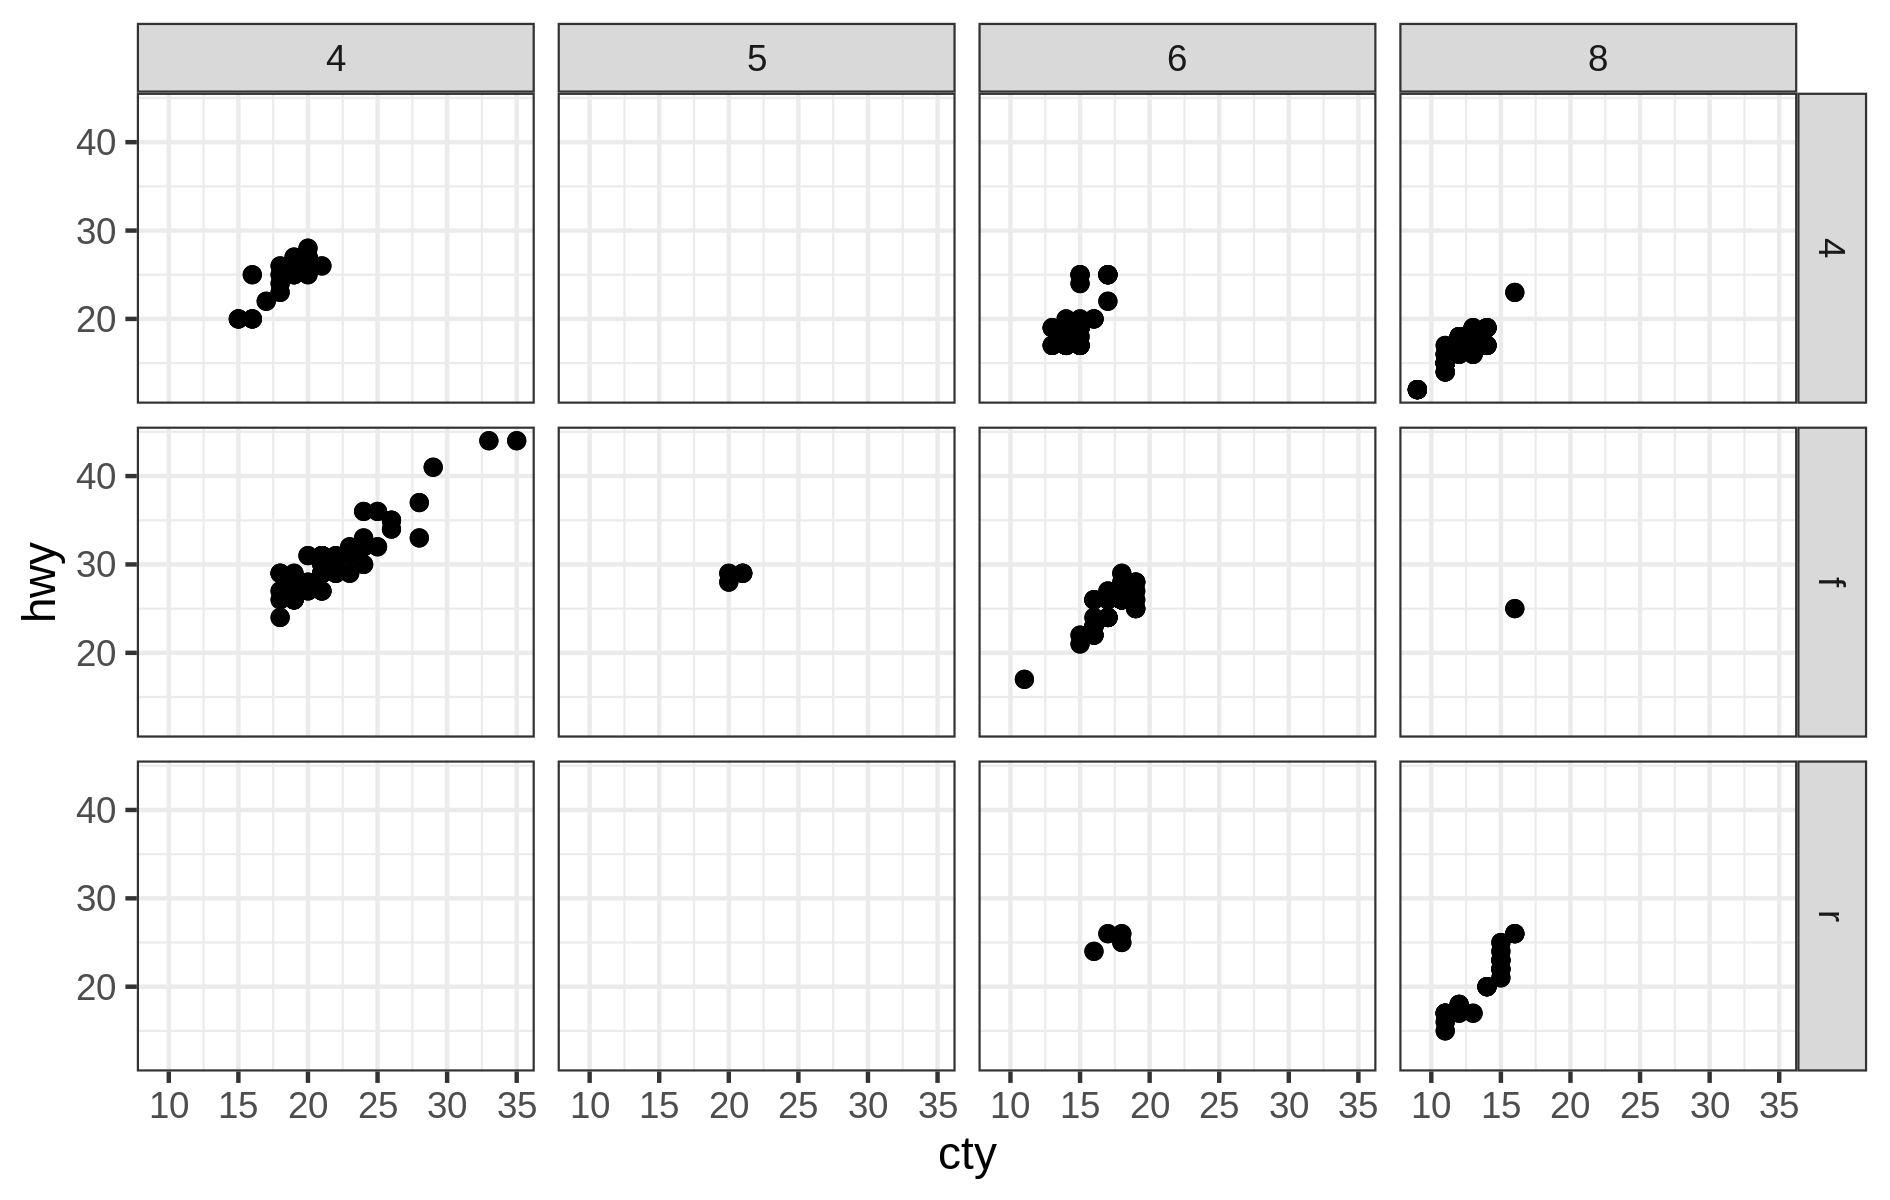

In [11]:
options(repr.plot.width=6.3, repr.plot.height=4)
m = pa + geom_point() +
facet_grid(drv ~ cyl) +
theme(strip.text = element_text(size=20)) +
theme_bw()

m

## Additional packages

E.g. "Patchwork"

github.com/thomasp85/patchwork

https://patchwork.data-imaginist.com/articles/guides/layout.html

In [13]:
#install.packages("patchwork")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [14]:
library('patchwork')

In [15]:
mpg.new = mpg %>%
    mutate(outlier = ifelse(hwy > 20 & displ > 5, "yes", "no"))

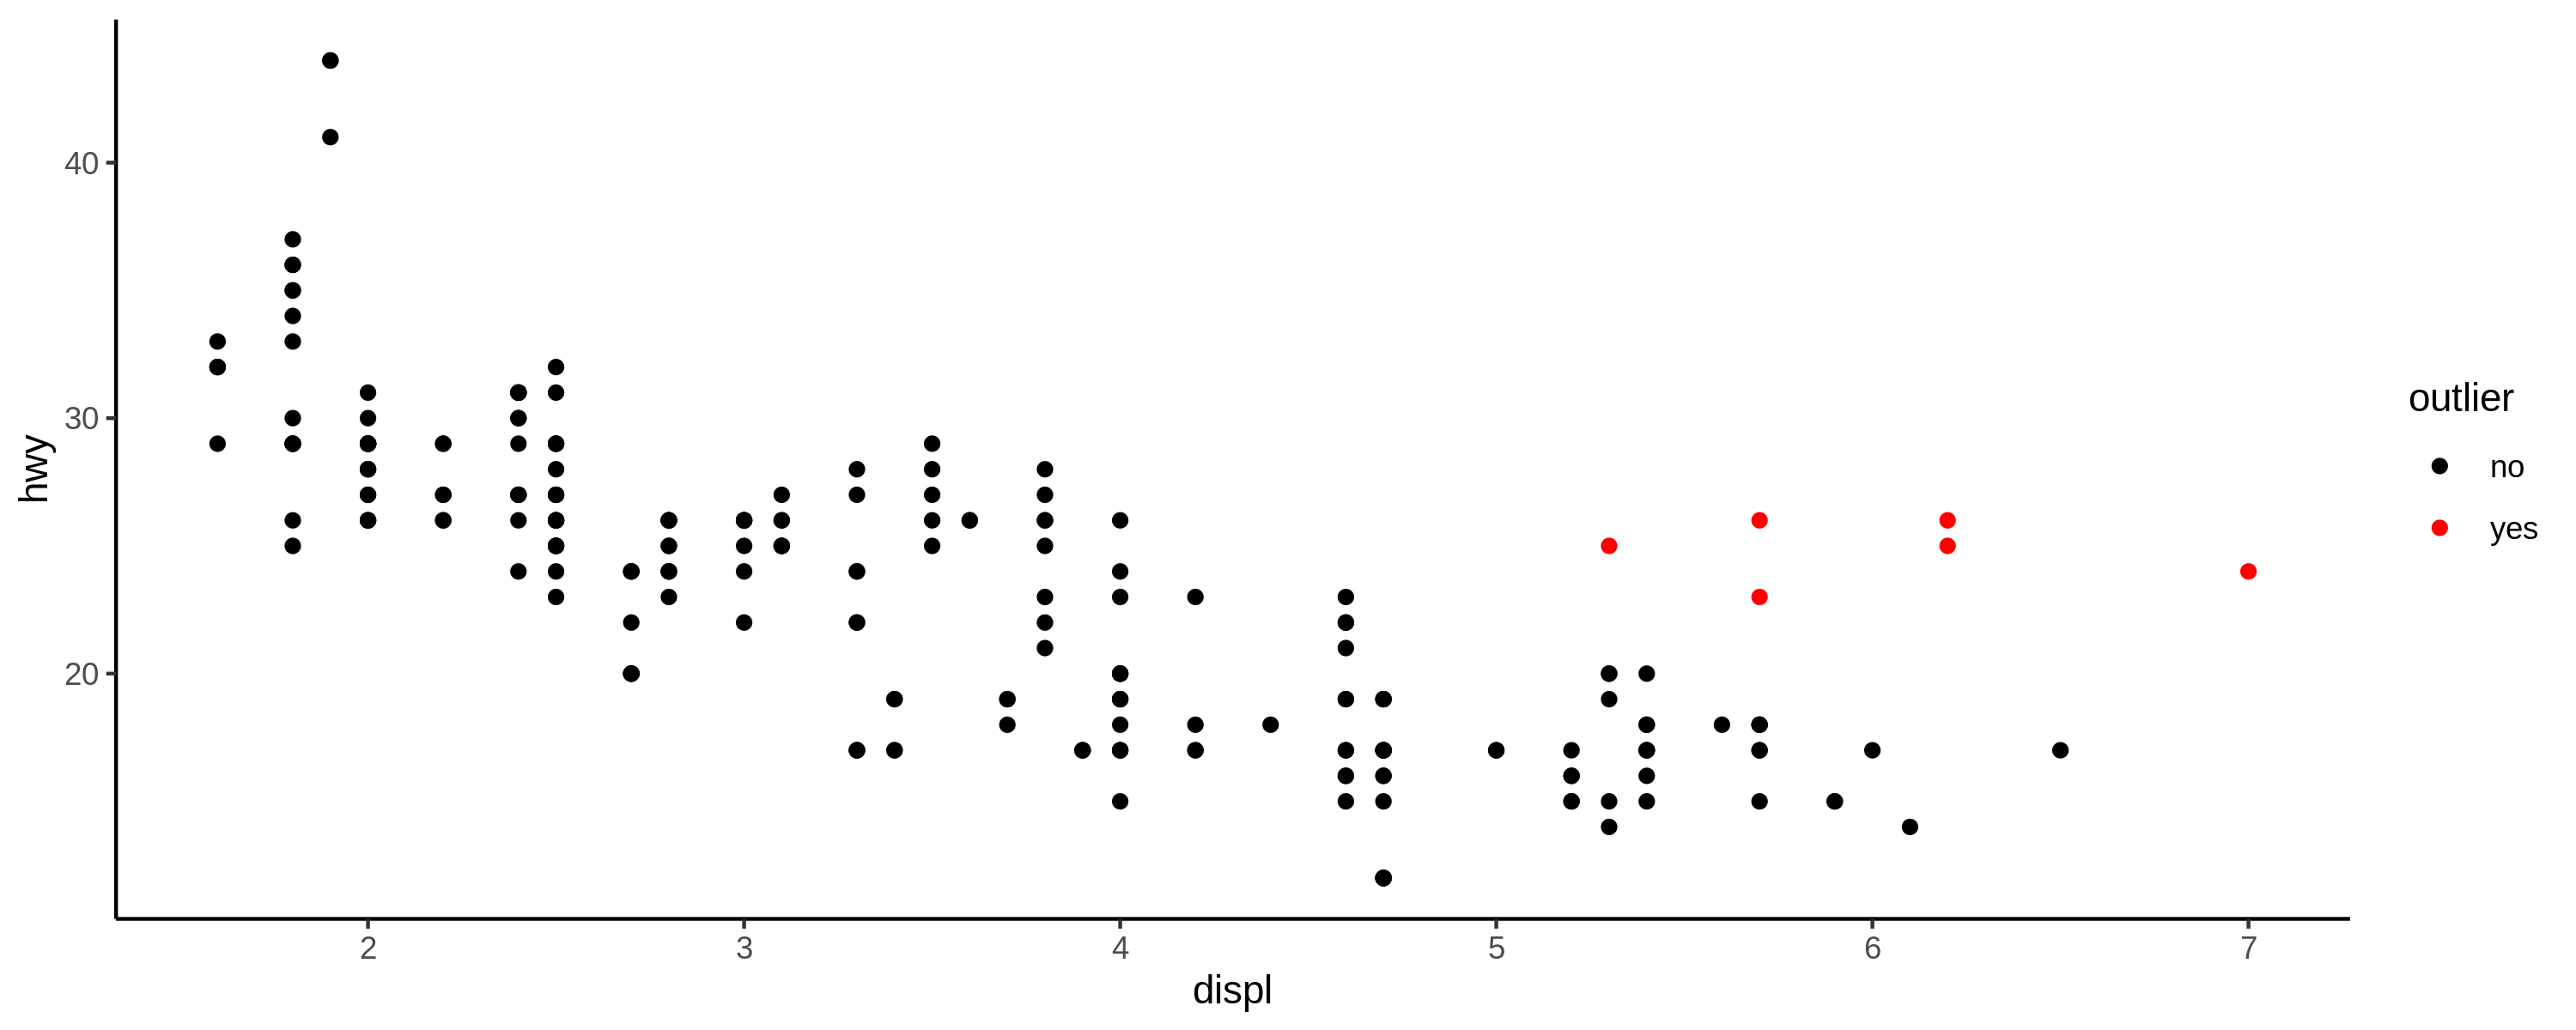

In [23]:
z = ggplot(mpg.new, aes(x=displ, y=hwy, color=outlier)) +
geom_point() +
scale_color_manual(values=c("black","red")) +
theme_classic()
z

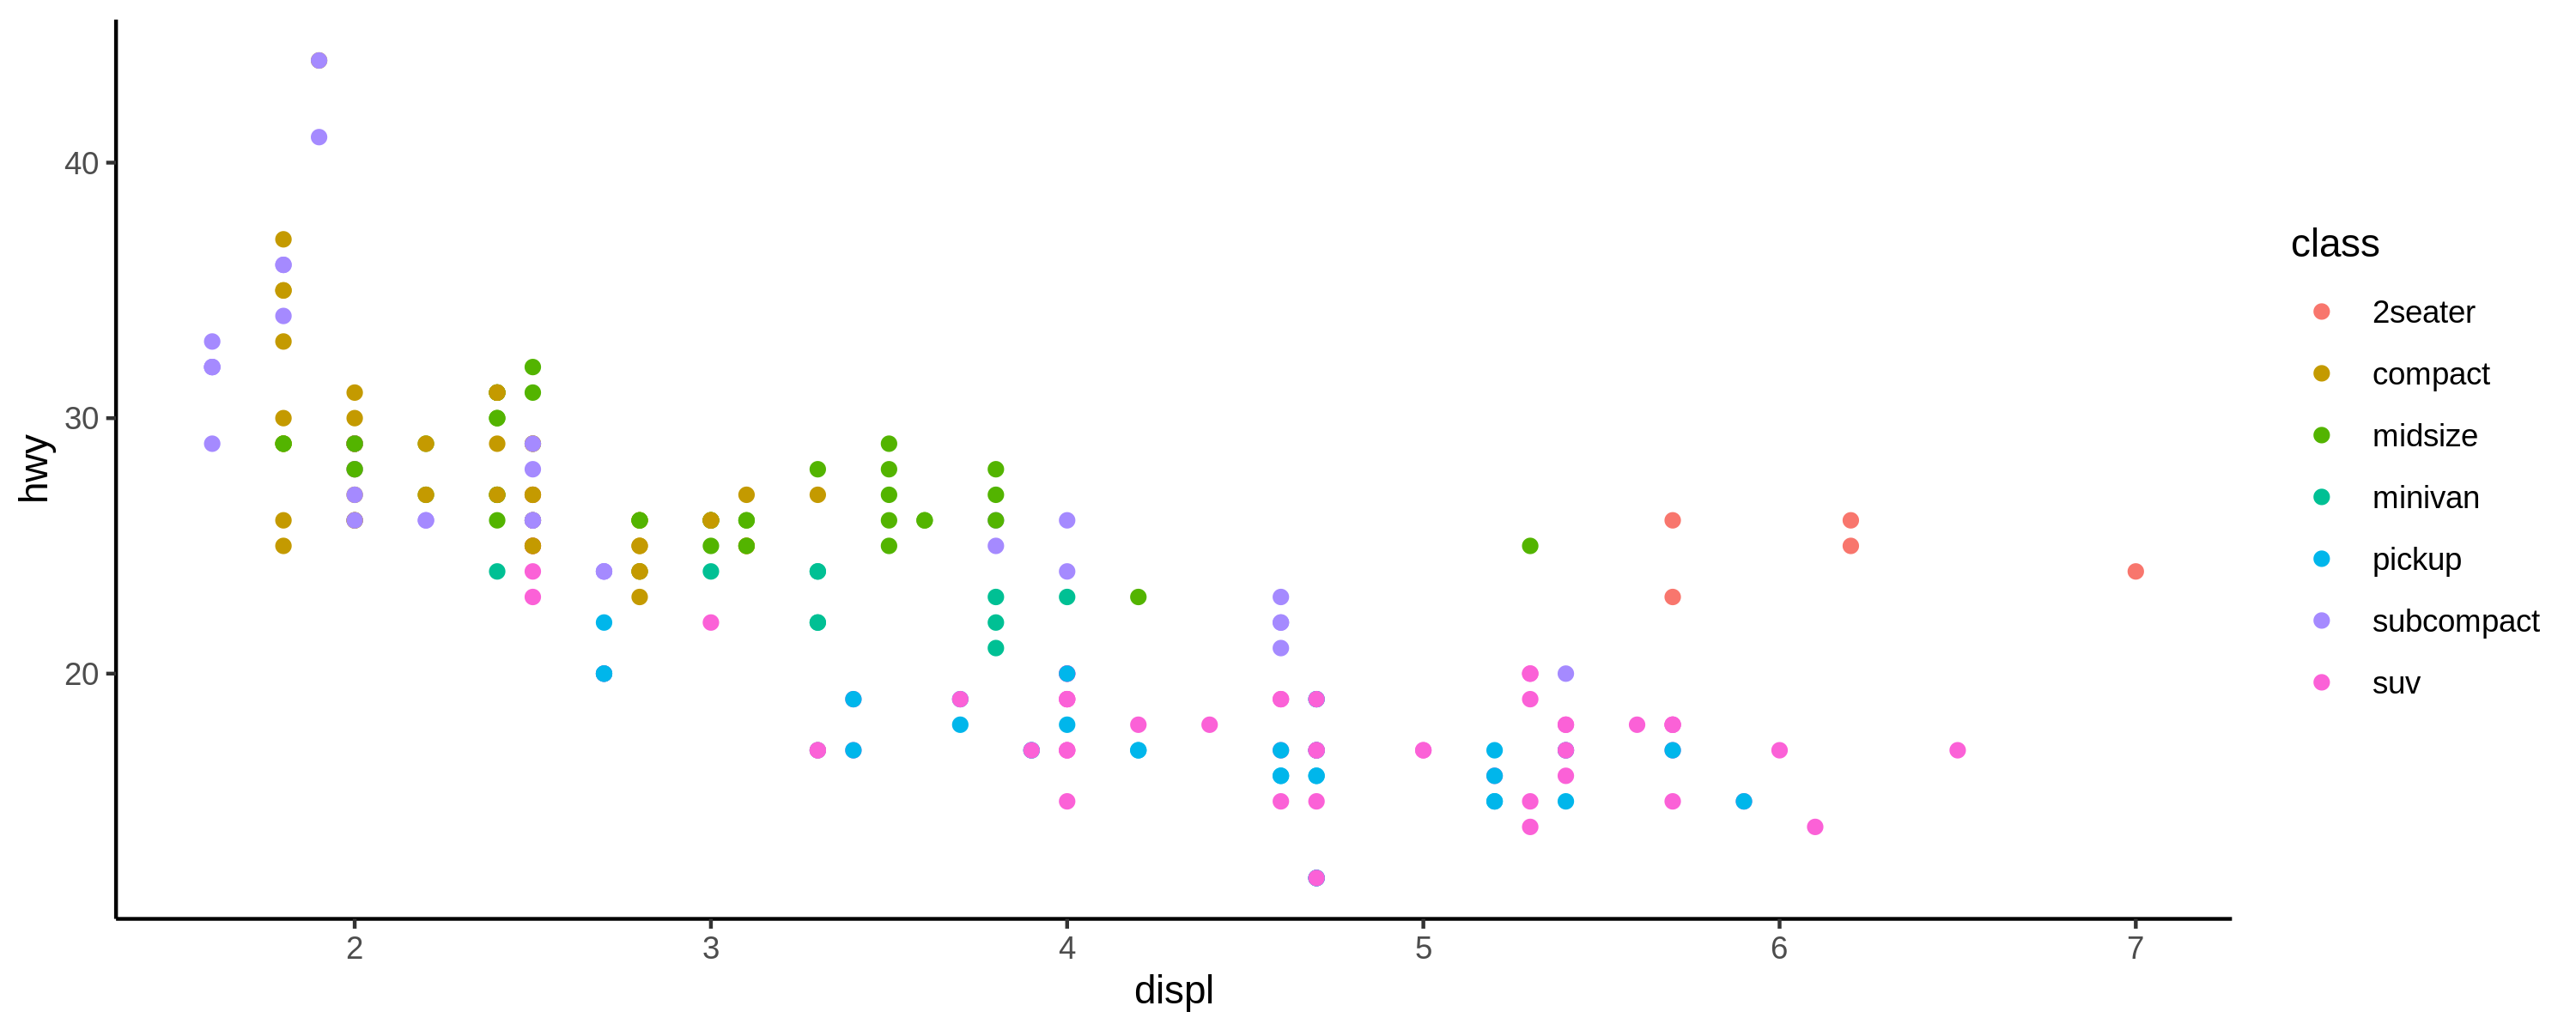

In [24]:
z2 = ggplot(mpg.new, aes(x=displ, y=hwy, color=class)) +
geom_point() + theme_classic()
z2

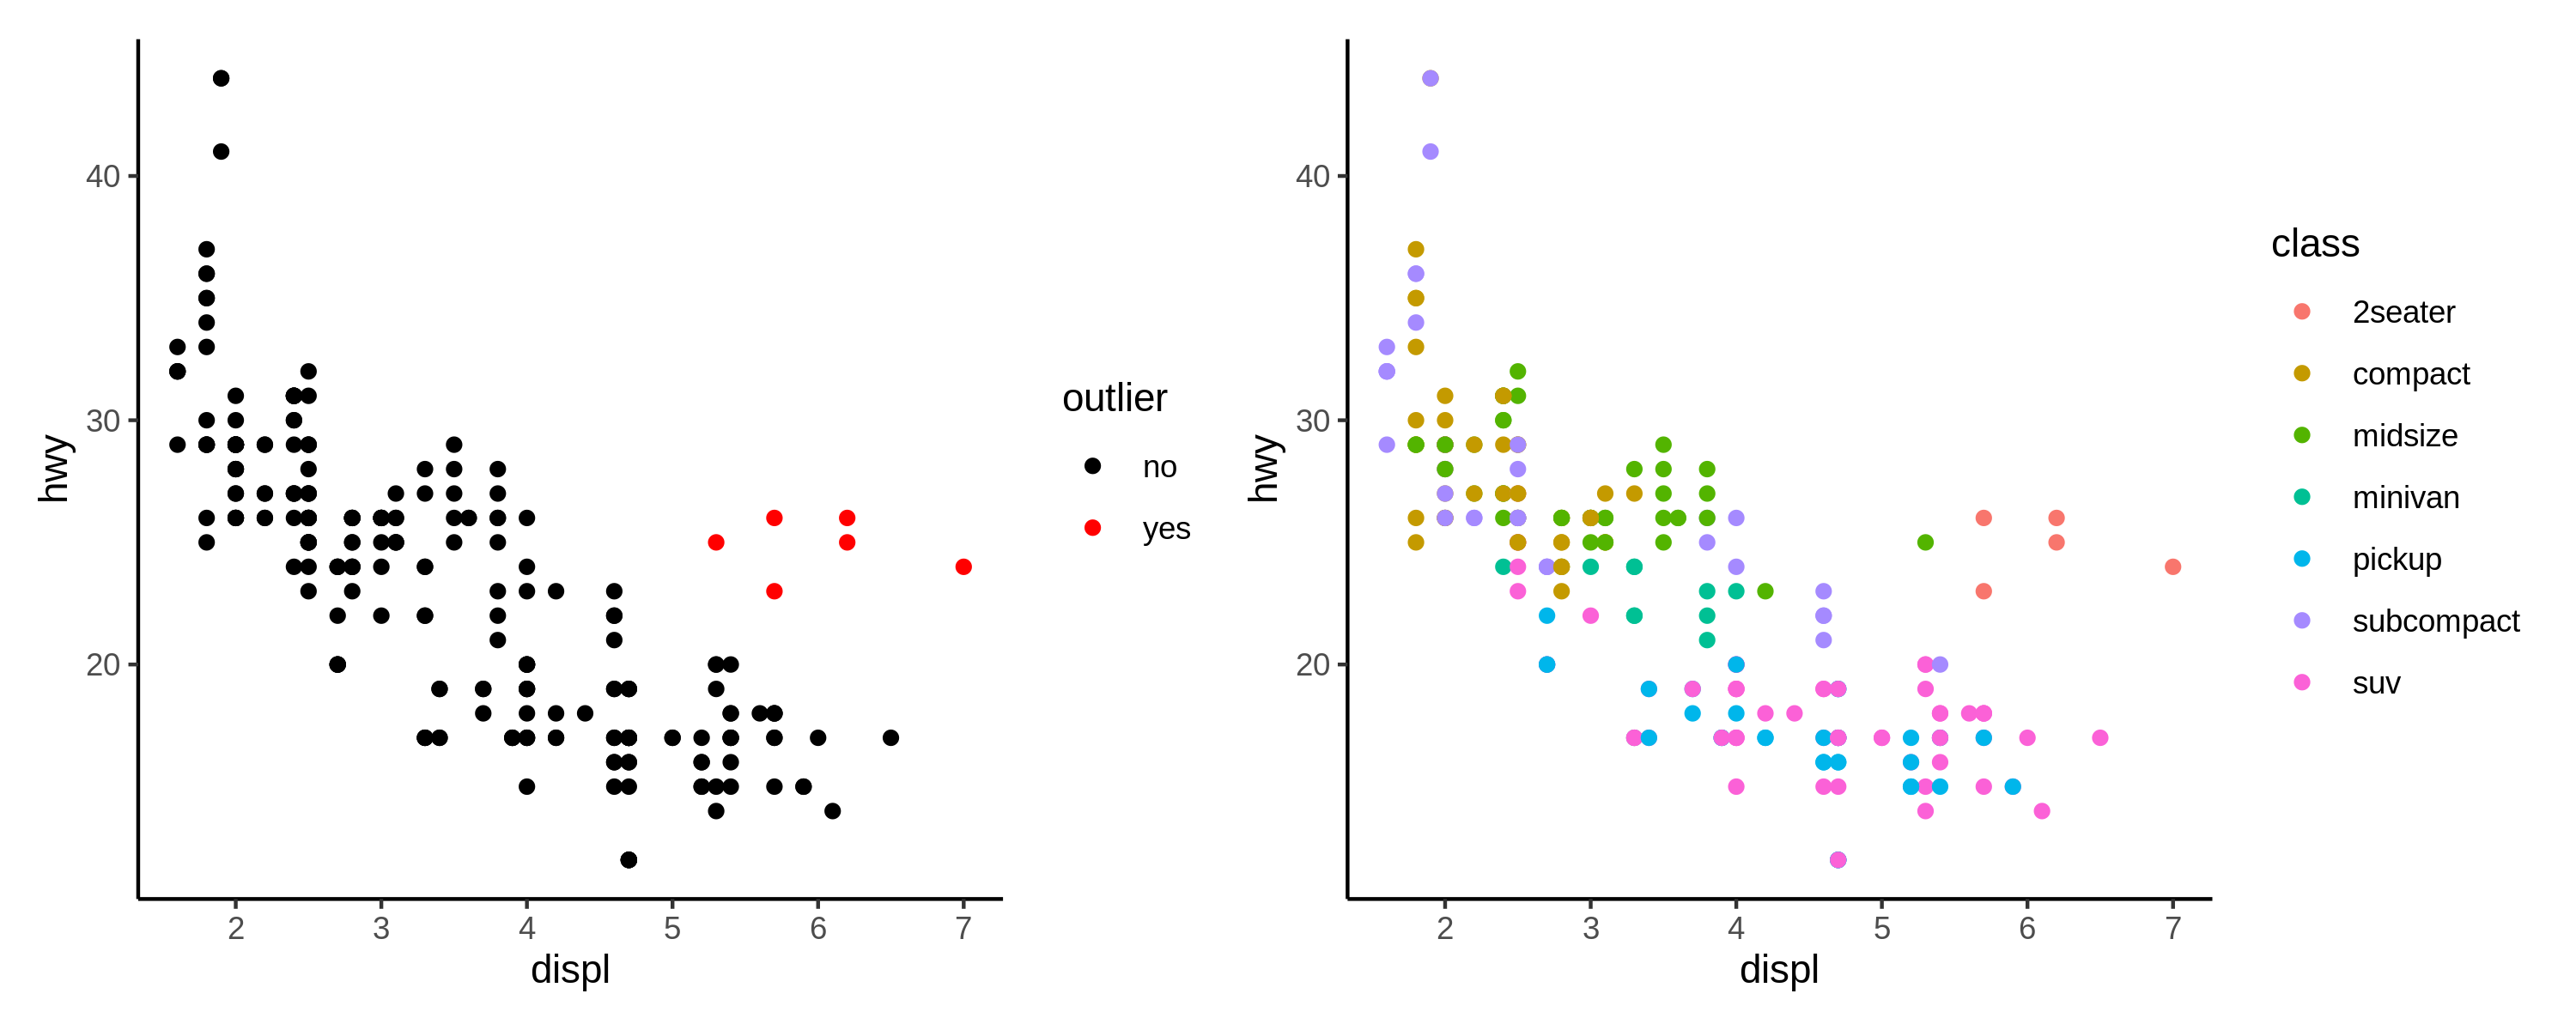

In [25]:
options(repr.plot.width=10, repr.plot.height=4)
z+z2

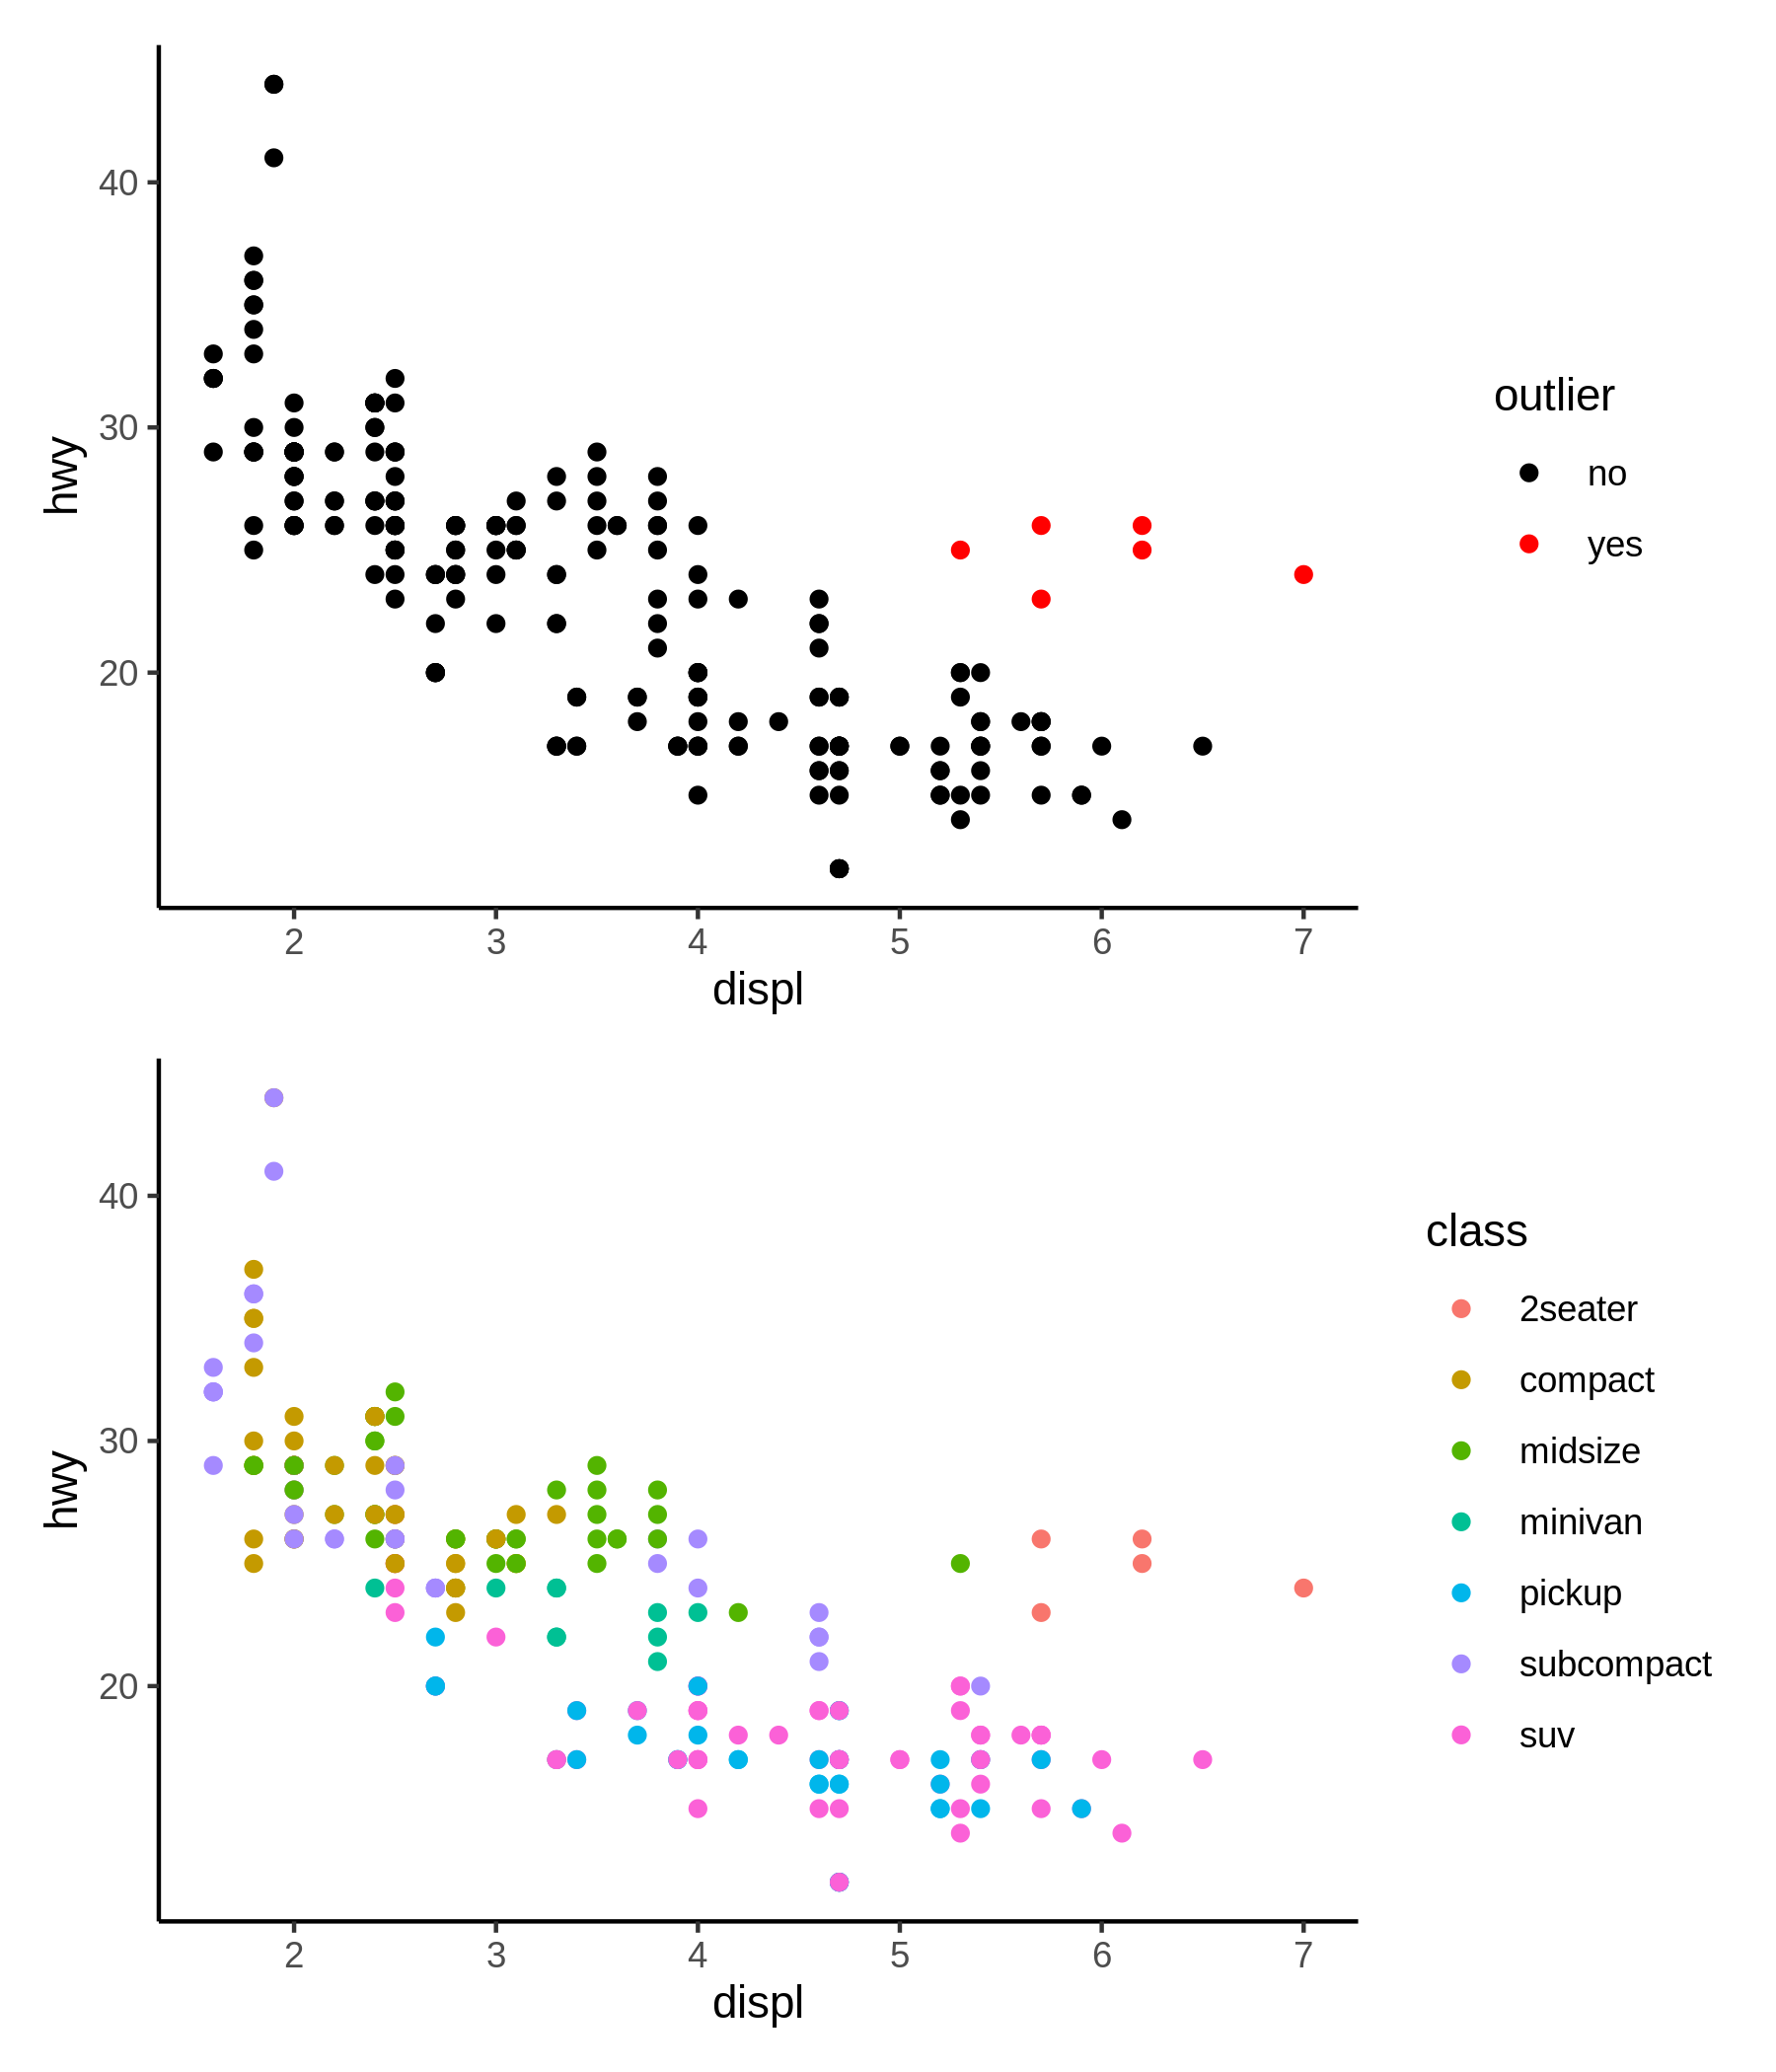

In [27]:
options(repr.plot.width=6, repr.plot.height=7)
z/z2

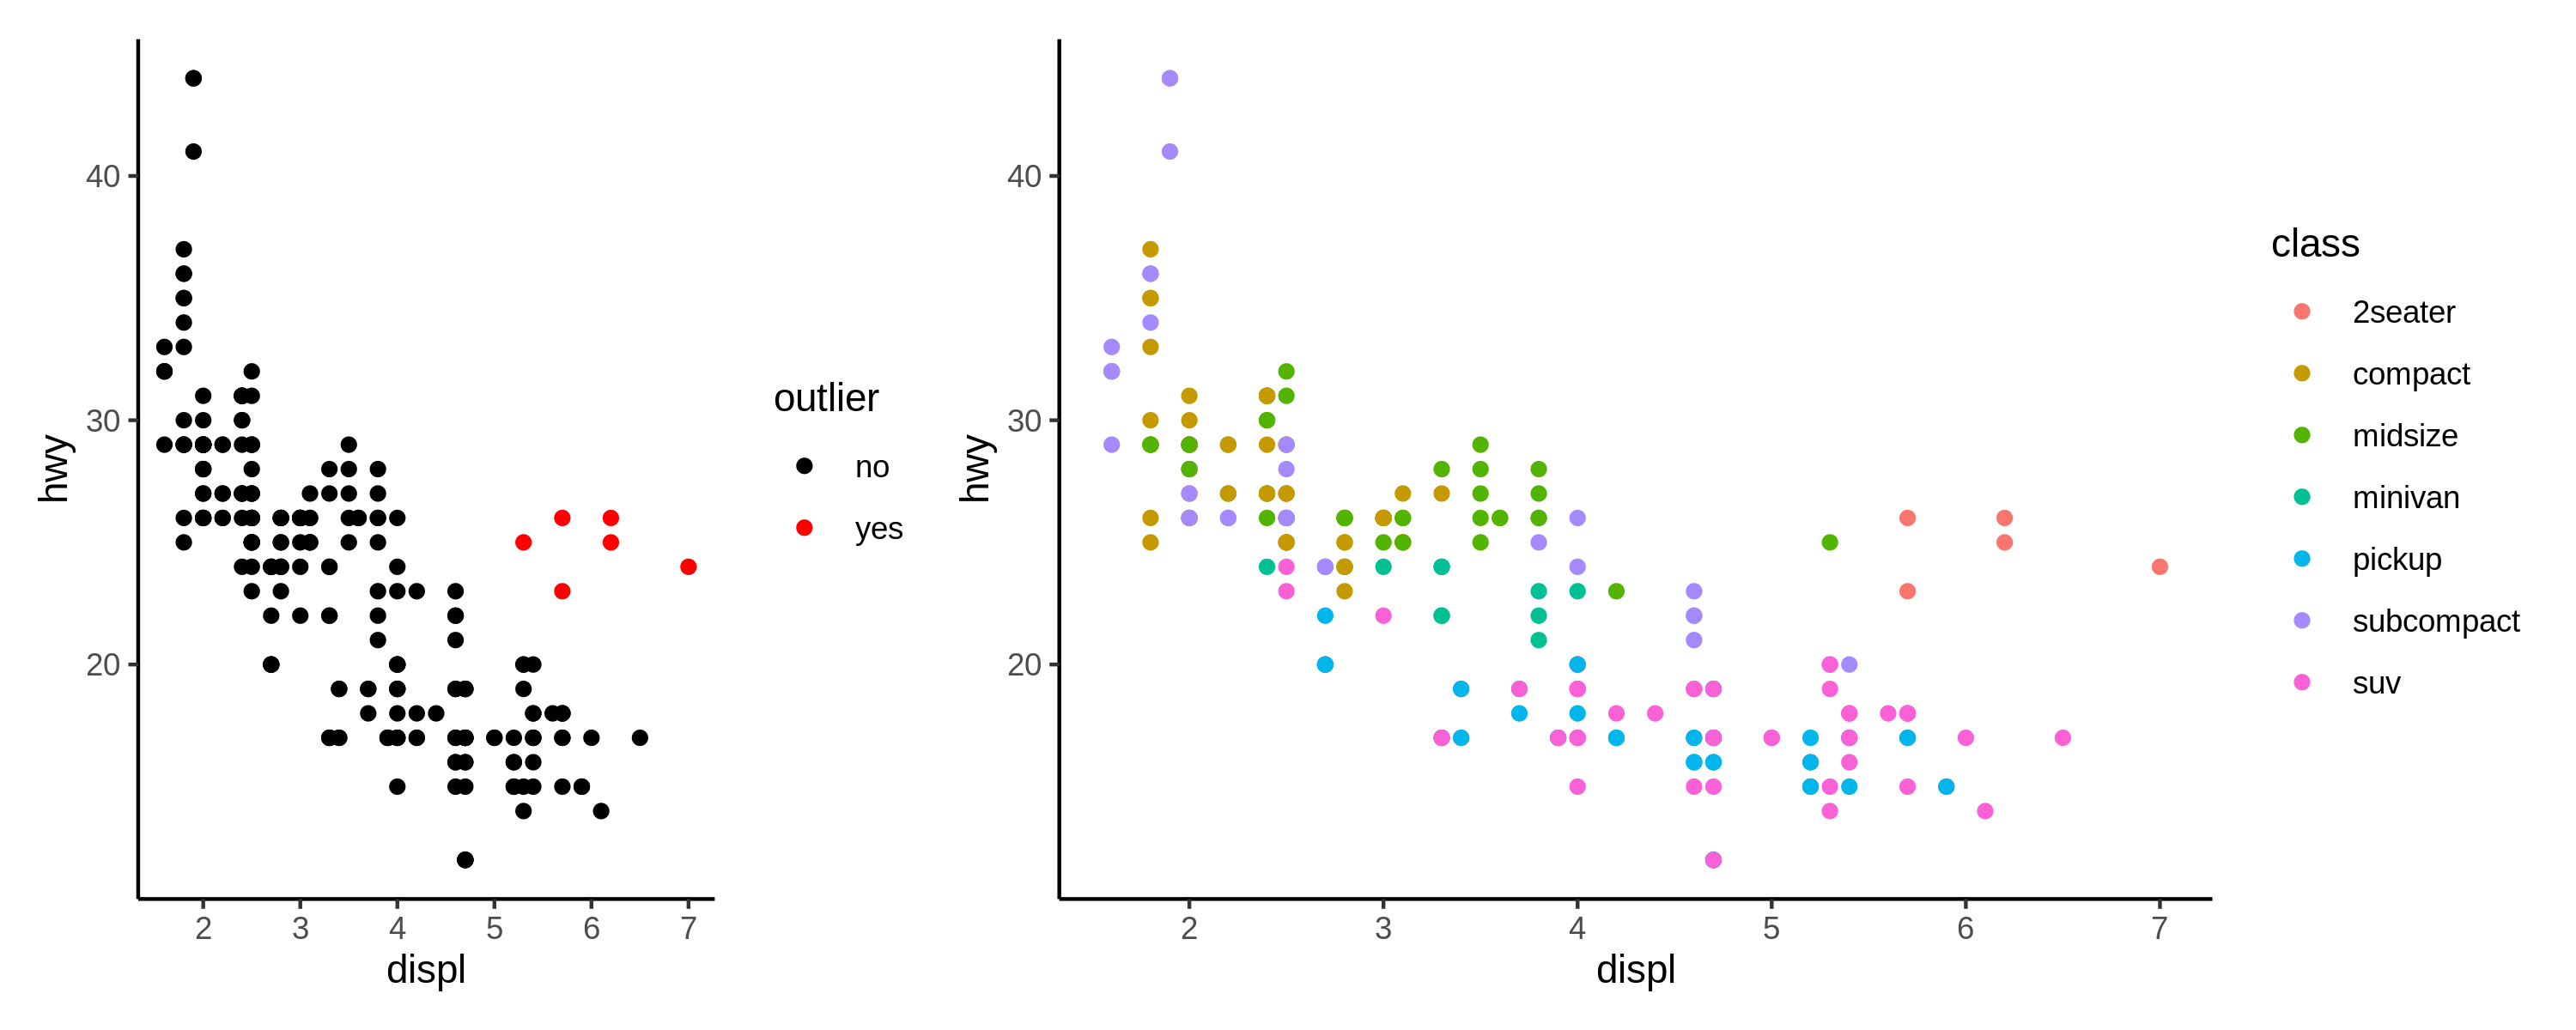

In [30]:
options(repr.plot.width=10, repr.plot.height=4)
z + z2 +
plot_layout(widths=c(1,2))